In [1]:
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns

In [32]:
import warnings

# Ignore all warnings (not recommended in general)
warnings.filterwarnings("ignore")

In [8]:
data = pd.read_csv('Training.csv')
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [9]:
data = data.drop('Unnamed: 133', axis=1)

In [10]:
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [11]:
diseases = data['prognosis'].unique()

In [13]:
df_dict = {}
for disease in diseases:
    df_dict[disease] = data[data['prognosis'] == disease]

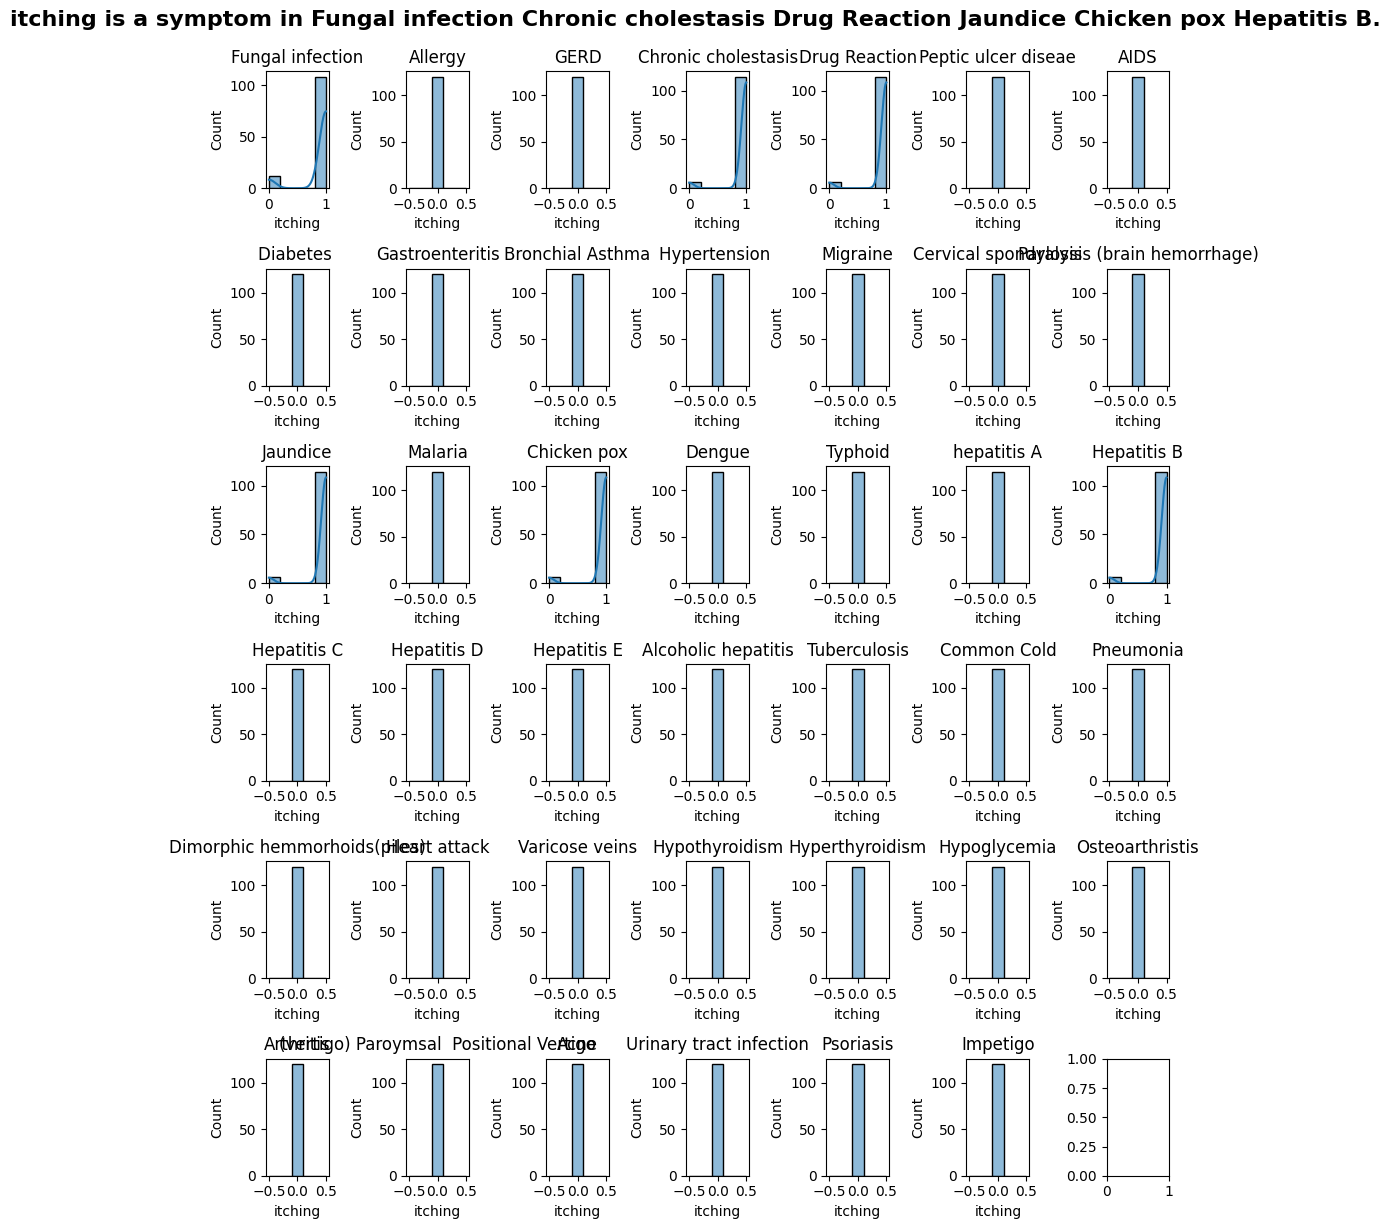

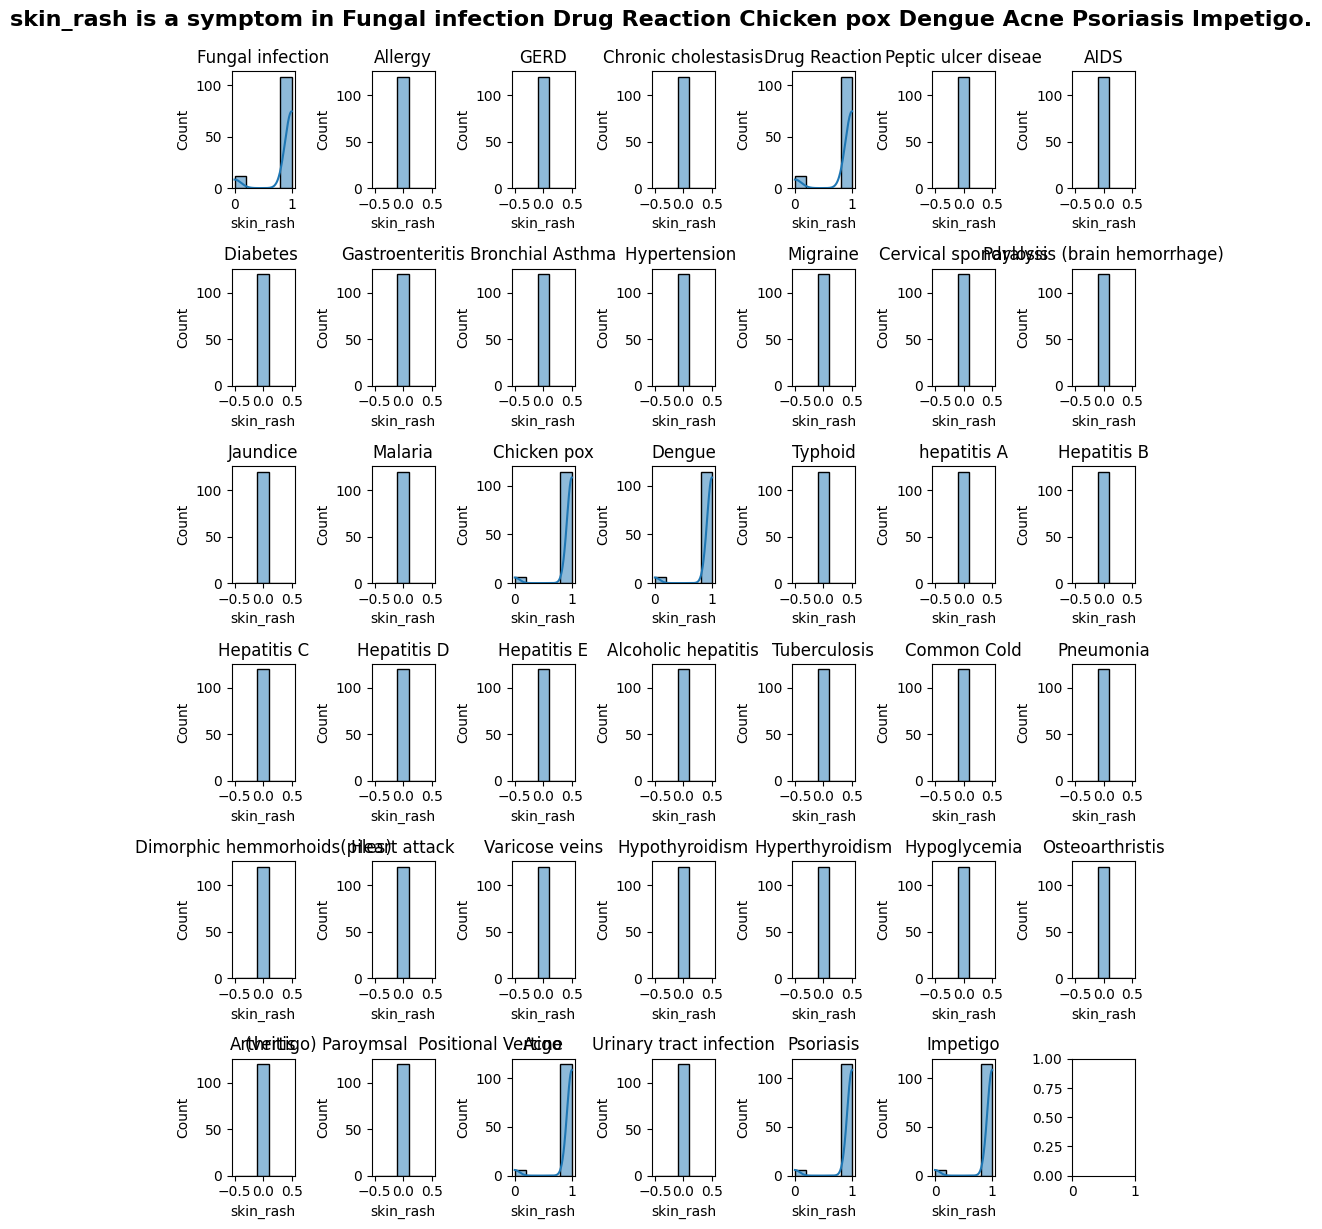

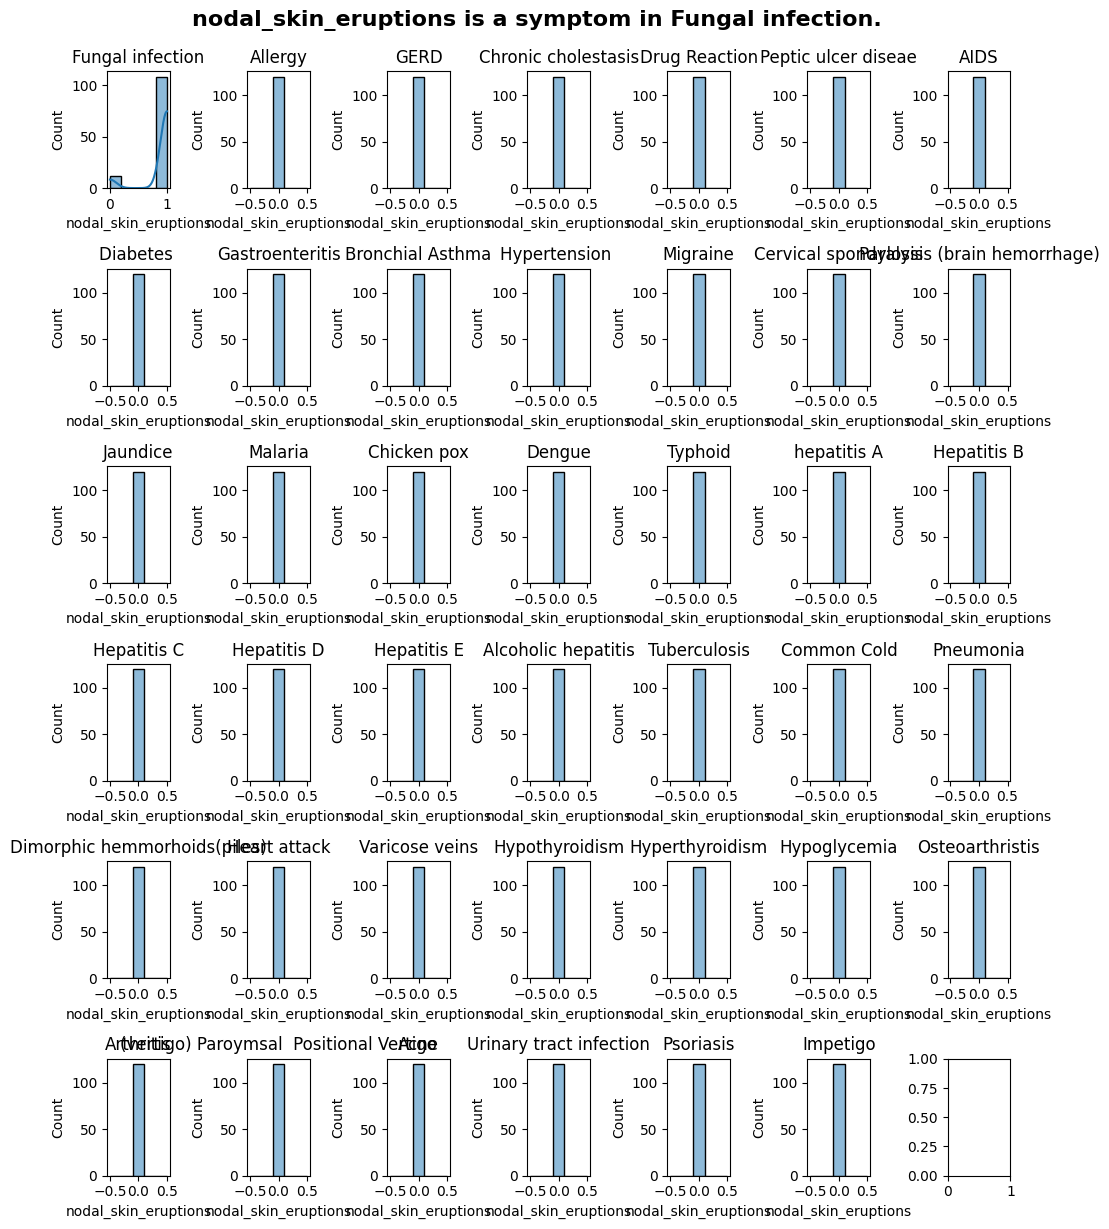

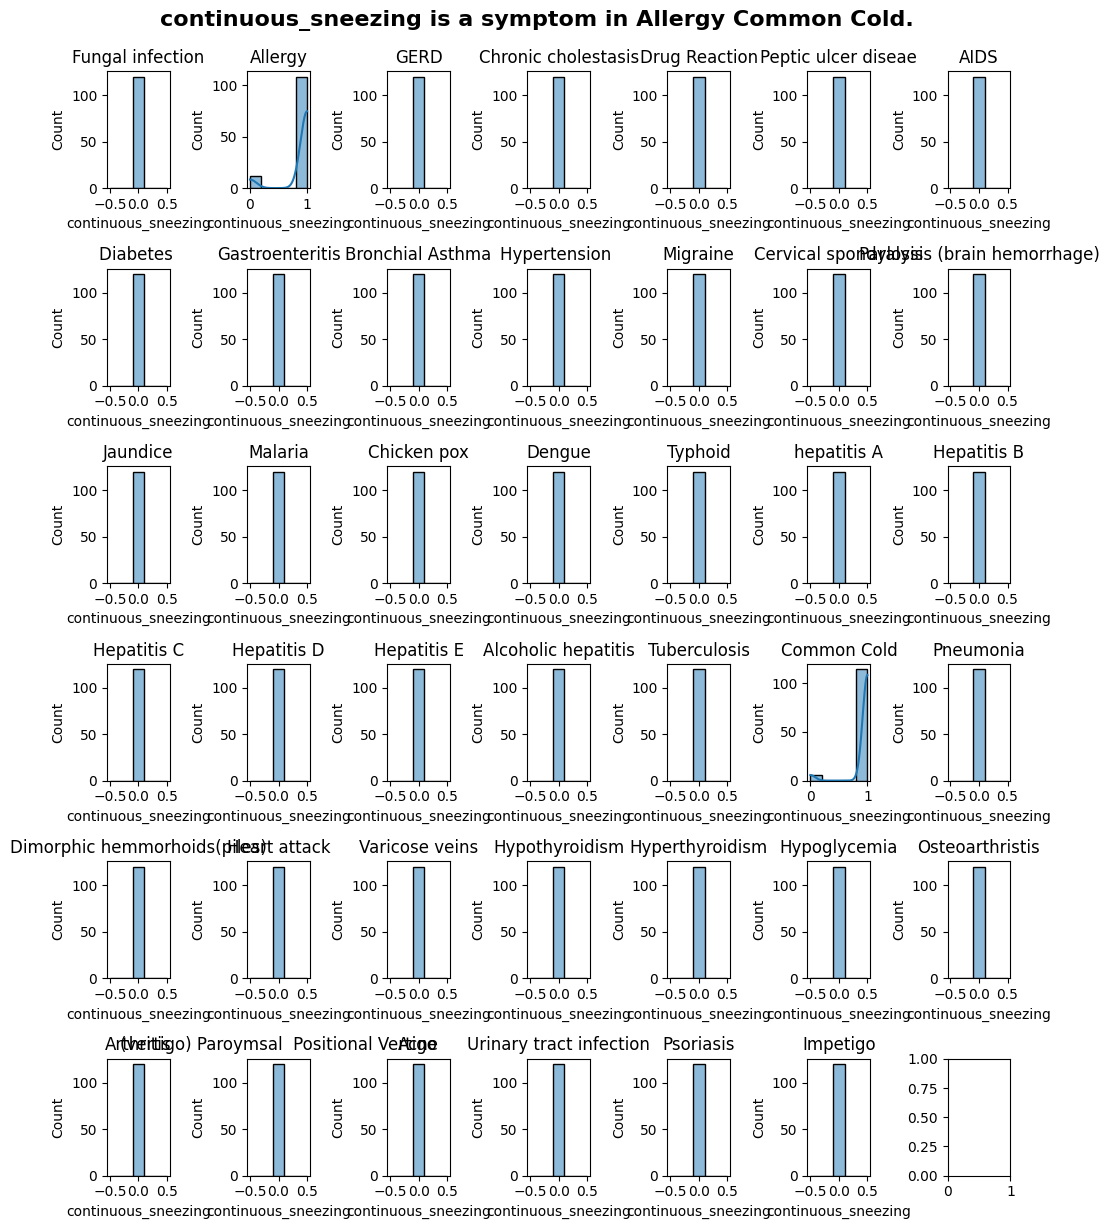

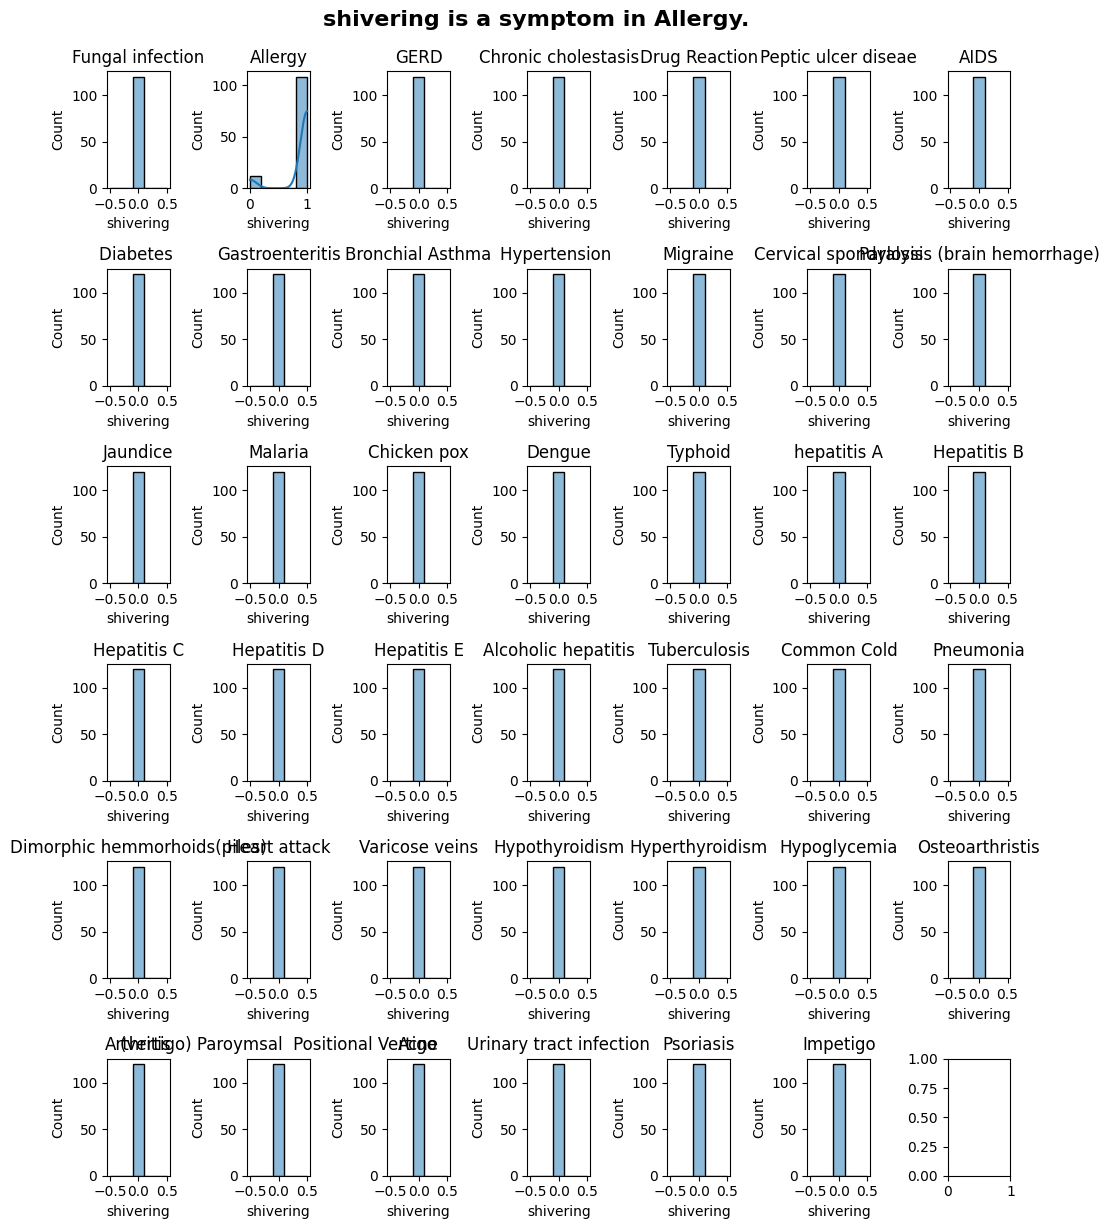

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_dict is a dictionary containing DataFrames for each key
for column in df_dict['Allergy'].columns[:5]:
    # Determine the number of subplots based on the length of df_dict
    num_plots = len(df_dict)

    # Calculate the number of rows and columns for subplots
    # You can adjust these based on your preference
    num_cols = 7  # Number of columns of subplots
    num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate number of rows needed

    # Create a figure and axes for subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 2*num_rows))

    # Flatten the axes array to handle varying numbers of plots
    axes = axes.flatten()
    
    effects = []

    # Iterate over df_dict items and plot histograms
    for i, (key, value) in enumerate(df_dict.items()):
        
        if sum(value[column])/len(value) > 0.5:
            effects.append(key)
            
        # Select the current axis for the subplot
        ax = axes[i]
        
        # Plot histogram using seaborn
        sns.histplot(value[column], bins=5, kde=True, ax=ax)
        
        # Set title for the subplot
        ax.set_title(f'{key}')
        
    # Adjust layout and spacing of subplots
    plt.tight_layout()
    # Join the 'effects' list into a single string separated by spaces
    effects_str = " ".join(effects)

    # Use proper f-string syntax for the title
    fig.suptitle(f"{column} is a symptom in {effects_str}.", fontsize=16, fontweight='bold', y=1.02)

    # Show the plot
    plt.show()

In [48]:
X = data.drop('prognosis', axis=1)
y = data['prognosis']

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the logistic regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
# Example evaluation for Logistic Regression model
lr_pred = lr_model.predict(X_test)
accuracy = accuracy_score(y_test, lr_pred)
print("Logistic regression Accuracy:", accuracy)
#print(classification_report(y_test, lr_pred))

from sklearn.svm import SVC

# Initialize and train the SVM model
svm_model = SVC(kernel='linear', gamma='scale')
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, svm_pred)
print("SVM with Linear kernel Accuracy:", accuracy)
#print(classification_report(y_test, svm_pred))

from sklearn.tree import DecisionTreeClassifier

# Initialize and train the decision tree classifier model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, dt_pred)
print("Decision tree Accuracy:", accuracy)
#print(classification_report(y_test, dt_pred))

from sklearn.ensemble import RandomForestClassifier

# Initialize and train the random forest classifier model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, rf_pred)
print("Random forest (Ensemble of Decision tree) Accuracy:", accuracy)
#print(classification_report(y_test, rf_pred))




Logistic regression Accuracy: 1.0
SVM with Linear kernel Accuracy: 1.0
Decision tree Accuracy: 0.9951219512195122
Random forest (Ensemble of Decision tree) Accuracy: 1.0


In [52]:
print("Logistic regression")
print(classification_report(y_test, lr_pred))
print("SVM linear kernel")
print(classification_report(y_test, svm_pred))
print("Decision trees")
print(classification_report(y_test, dt_pred))
print("Random forest Ensemble(Decision trees)")
print(classification_report(y_test, rf_pred))


Logistic regression
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        55
                                   AIDS       1.00      1.00      1.00        57
                                   Acne       1.00      1.00      1.00        62
                    Alcoholic hepatitis       1.00      1.00      1.00        65
                                Allergy       1.00      1.00      1.00        53
                              Arthritis       1.00      1.00      1.00        59
                       Bronchial Asthma       1.00      1.00      1.00        60
                   Cervical spondylosis       1.00      1.00      1.00        59
                            Chicken pox       1.00      1.00      1.00        59
                    Chronic cholestasis       1.00      1.00      1.00        58
                            Common Cold       1.00      1.00      1.00        57
       

 Osteoarthristis       0.89      1.00      0.94        48

In [54]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Initialize KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=5)  # Specify the number of neighbors (k)

# Train the KNN classifier
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("KNN Accuracy:", accuracy)

print(classification_report(y_test, y_pred))

KNN Accuracy: 1.0
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        55
                                   AIDS       1.00      1.00      1.00        57
                                   Acne       1.00      1.00      1.00        62
                    Alcoholic hepatitis       1.00      1.00      1.00        65
                                Allergy       1.00      1.00      1.00        53
                              Arthritis       1.00      1.00      1.00        59
                       Bronchial Asthma       1.00      1.00      1.00        60
                   Cervical spondylosis       1.00      1.00      1.00        59
                            Chicken pox       1.00      1.00      1.00        59
                    Chronic cholestasis       1.00      1.00      1.00        58
                            Common Cold       1.00      1.00      1.00        57
         

In [64]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming X is your feature matrix (unsupervised learning - no target variable y needed)
# Scale the features (important for clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.fit_transform(X_test)


# Initialize KMeans clustering
kmeans_model = KMeans(n_clusters= 41, random_state=42)  # Specify the number of clusters (k)

# Fit KMeans clustering model to the scaled data
kmeans_model.fit(X_scaled)

# Get cluster labels
cluster_labels = kmeans_model.labels_

# Print cluster centers (centroids)
print("Cluster Centers:")
print(kmeans_model.cluster_centers_)

# Assess the distribution of data points in each cluster
unique, counts = np.unique(cluster_labels, return_counts=True)
print("Cluster Distribution:")
print(dict(zip(unique, counts)))

from sklearn.metrics import silhouette_score

# Assuming X_test_scaled is the scaled test data using the same scaler as training data

# Predict cluster labels for the test data
y_pred_test = kmeans_model.predict(X_test_scaled)

# Evaluate clustering using silhouette score
silhouette_avg = silhouette_score(X_test_scaled, y_pred_test)
print("Kmeans silhouette score:", silhouette_avg)



Cluster Centers:
[[ 2.35627134  2.02042825 -0.14981285 ... -0.15401412 -0.15401412
  -0.15401412]
 [-0.39978778 -0.4360397  -0.14981285 ... -0.15401412 -0.15401412
  -0.15401412]
 [-0.39978778 -0.4360397  -0.14981285 ... -0.15401412 -0.15401412
  -0.15401412]
 ...
 [-0.39978778 -0.4360397  -0.14981285 ... -0.15401412 -0.15401412
  -0.15401412]
 [-0.39978778 -0.4360397  -0.14981285 ... -0.15401412 -0.15401412
  -0.15401412]
 [-0.39978778 -0.4360397  -0.14981285 ... -0.15401412 -0.15401412
  -0.15401412]]
Cluster Distribution:
{0: 120, 1: 120, 2: 120, 3: 120, 4: 120, 5: 120, 6: 120, 7: 120, 8: 120, 9: 120, 10: 120, 11: 120, 12: 120, 13: 120, 14: 120, 15: 120, 16: 120, 17: 120, 18: 120, 19: 120, 20: 120, 21: 120, 22: 120, 23: 120, 24: 120, 25: 120, 26: 120, 27: 120, 28: 120, 29: 120, 30: 120, 31: 120, 32: 120, 33: 120, 34: 120, 35: 120, 36: 120, 37: 120, 38: 120, 39: 120, 40: 120}
Kmeans silhouette score: 0.7592195270405304
